In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3492,3493,15626491,Hughes,655,France,Female,45,7,57327.04,1,0,1,47349.00,0
720,721,15721658,Fleming,672,Spain,Female,56,2,209767.31,2,1,1,150694.42,1
3028,3029,15675185,Chuang,697,Germany,Female,48,2,108128.96,2,1,1,103944.37,0
2888,2889,15658339,Pugliesi,795,Germany,Male,37,2,139265.63,2,1,1,198745.94,0
6069,6070,15810775,Tsao,576,Spain,Male,52,2,100549.43,2,1,1,16644.16,0


In [3]:
df.drop('RowNumber',axis='columns',inplace=True)

In [4]:
df.drop('Surname',axis='columns',inplace=True)

In [5]:
df.drop('Geography',axis='columns',inplace=True)

In [6]:
df.dtypes

CustomerId           int64
CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.sample(10)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
38,15717426,850,Male,36,7,0.00,1,1,1,40812.90,0
5815,15788022,802,Female,41,4,90757.64,2,0,1,169183.66,0
424,15566111,596,Male,39,9,0.00,1,1,0,48963.59,0
4531,15656029,609,Male,37,6,0.00,2,0,1,22030.72,0
3887,15769110,653,Female,46,5,0.00,2,1,0,49707.85,0
6558,15721937,686,Male,38,0,138131.34,1,0,1,115927.85,0
8578,15707011,495,Male,47,10,137682.68,1,1,0,71071.47,0
8755,15697510,707,Female,52,7,0.00,1,1,0,109688.82,1
3009,15660200,551,Male,31,1,0.00,2,1,1,185105.44,0
5997,15583033,640,Female,20,4,0.00,2,0,1,78310.82,0


In [8]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [9]:
print_unique_col_values(df)

Gender: ['Female' 'Male']


In [10]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [11]:
df.sample(5)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7684,15808223,615,0,41,1,126773.43,1,1,1,55551.26,0
1051,15715003,625,1,49,2,80816.45,1,1,1,20018.79,0
885,15721935,521,0,25,7,0.00,2,1,1,157878.67,0
9646,15603111,850,0,71,10,69608.14,1,1,0,97893.40,1
7883,15776051,551,1,45,6,0.00,2,1,1,51143.43,0


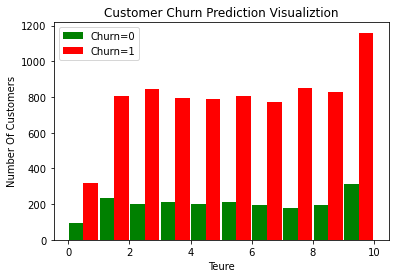

In [12]:
tenure_exited_no = df[df.Exited==0].Tenure
tenure_exited_yes = df[df.Exited==1].Tenure

plt.xlabel("Teure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=0','Churn=1'])
plt.legend()

In [13]:
df1 = pd.get_dummies(data=df, columns=['CreditScore','Age','Tenure','Balance'])
df1.columns

Index(['CustomerId', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CreditScore_350', 'CreditScore_351',
       'CreditScore_358',
       ...
       'Balance_212692.97', 'Balance_212696.32', 'Balance_212778.2',
       'Balance_213146.2', 'Balance_214346.96', 'Balance_216109.88',
       'Balance_221532.8', 'Balance_222267.63', 'Balance_238387.56',
       'Balance_250898.09'],
      dtype='object', length=6930)